<a href="https://colab.research.google.com/github/AndersonBarbosa10/projetos_data_science/blob/main/An%C3%A1lise_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do COVID-19 no Brasil

O COVID-19 é uma doença infecciosa causada pelo coronavírus SARS-CoV-2, potencialmente grave, de grande transmissibilidade e de distribuição global. Os coronavírus são uma grande família de vírus comuns em muitas espécies diferentes de animais, incluindo o homem, camelos, gado, gatos e morcegos.

De acordo com as evidências atuais, o coronavírus é transmitido principalmente por contato direto com uma pessoa infectada, gotículas respiratórias expelidas e aerossóis.

Normalmente, a maioria das pessoas apresentam sintomas leves da doença, como coriza, tosse, dor de garganta e dificuldade de respirar. Porém, algumas tem complicações com a doença, desenvolvendo sintamos mais graves, como febre alta, aumento dos batimentos cardíocos, dor no peito, pneumonia, insuficiênica renal e pode chegar a morte.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://image.freepik.com/vetores-gratis/lutar-contra-o-conceito-de-virus_52683-36505.jpg"></center>

Observa-se que a maioria das pessoas infectadas apresentam doença respiratórias leve a moderada e se recuperam sem a necessidade de tratamento especial. Idosos e aqueles com problemas médicos subjacentes, como doenças cardiovasculares, diabetes, doenças respiratórias crônicas e câncer, têm maior probabilidade de desenvolver doenças graves.

Com o objetivo de aumentar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Os dados foram retirados do portal [*Our World in Data*](https://ourworldindata.org/coronavirus), que é um site especializado em expor pesquisas empíricas e dados análiticos para fazer progresso aos maiores problemas mundiais.

Importante relatar, que há uma dificuldade grande em analisar uma doença nova, principalmente no Brasil, por termos diversas fontes de informações conflitantes. Com isso, o estudo adota como premissa os dados retirados do *Our World in Data*.

### Importando os dados do COVID-19

Inicialmente importamos as bibliotecas necessárias para analisarmos os dados. Após isso, importamos o dataset do COVID-19 para variável `df`, por meio da função `pd.read_csv`.


In [ ]:
# instalar o pywaffle
!pip install pywaffle -q

     |████████████████████████████████| 532kB 10.0MB/s 


In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns
sns.set()


# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

## Análise Exploratória dos Dados

Após importar as bibliotecas necessárias e o dataset, faremos a Análise Exploratória dos Dados, visando analisar os dados previamente, para que possamos obter um entendimento básico dos dados e as relações existentes entre as variáveis analisadas.


### Análise Exploratória Inicial

Utilizamos a função `df.head()` para visualizamos as 05 primeiras entradas do dataset e a função `df.tail()` para visualizarmos as 05 últimas. Com isso, conseguimos ter uma noção geral de como os dados estão organizados.

In [ ]:
# verificar as 05 primerias entradas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [ ]:
# verificando as 05 últimas entradas
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
101994,ZWE,Africa,Zimbabwe,2021-07-08,62383.0,2156.0,1594.571,2029.0,56.0,31.571,4197.222,145.059,107.285,136.514,3.768,2.124,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12811.0,720873.0,48.501,0.862,8053.0,0.542,0.198,5.1,tests performed,1433578.0,848808.0,584770.0,34821.0,13088.0,9.65,5.71,3.93,881.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101995,ZWE,Africa,Zimbabwe,2021-07-09,65066.0,2683.0,1771.857,2084.0,55.0,34.714,4377.738,180.516,119.213,140.215,3.700,2.336,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1464065.0,875182.0,588883.0,30487.0,15907.0,9.85,5.89,3.96,1070.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101996,ZWE,Africa,Zimbabwe,2021-07-10,66853.0,1787.0,1884.000,2126.0,42.0,38.143,4497.970,120.232,126.758,143.040,2.826,2.566,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16878.0,NaN,NaN,NaN,1136.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101997,ZWE,Africa,Zimbabwe,2021-07-11,67765.0,912.0,1898.714,2185.0,59.0,43.857,4559.331,61.361,127.748,147.010,3.970,2.951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101998,ZWE,Africa,Zimbabwe,2021-07-12,70426.0,2661.0,2058.857,2236.0,51.0,46.429,4738.367,179.036,138.523,150.441,3.431,3.124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


Para verificar o tamanho do DataFrame usamos a função `df.shape`.



In [ ]:
# verificar o tamanho do dataset
print("Variáveis: {}\t".format(df.shape[1]))
print("Entradas: {}\t".format(df.shape[0]))

Variáveis: 60	
Entradas: 101999	


Pode-se perceber que o DataFrame possui 60 variáveis e 100.446 entradas (linhas).

Para verificar os nomes de cada variável usamos a função `df.columns`.

In [ ]:
# verificar os nomes das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

Após isso, usamos a função `df.dypes` para verificarmos os tipos de cada variável.

In [ ]:
# verificar os tipos das variávies
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

Percebemos que a maioria das variáveis são do tipo *float64*. 
Importante atentar para o tipo da variável *date*, que está como *object*. Com isso, precisamos transformar essa variável para o tipo *datetime*, por meio da função `pd.to_datetime`.

In [ ]:
# transformar o tipo da variável `date` para datetime
df.date = pd.to_datetime(df.date)

In [ ]:
# verificando o tipo das variáveis
df.dtypes

iso_code                                         object
continent                                        object
location                                         object
date                                     datetime64[ns]
total_cases                                     float64
new_cases                                       float64
new_cases_smoothed                              float64
total_deaths                                    float64
new_deaths                                      float64
new_deaths_smoothed                             float64
total_cases_per_million                         float64
new_cases_per_million                           float64
new_cases_smoothed_per_million                  float64
total_deaths_per_million                        float64
new_deaths_per_million                          float64
new_deaths_smoothed_per_million                 float64
reproduction_rate                               float64
icu_patients                                    

Para verificar os valores ausentes, utilizamos a função `df.isnull`.

In [ ]:
# verificar valores ausentes
round(df.isnull().sum().sort_values(ascending=False) / df.shape[0],2)

weekly_icu_admissions                    0.99
weekly_icu_admissions_per_million        0.99
weekly_hosp_admissions                   0.98
weekly_hosp_admissions_per_million       0.98
excess_mortality                         0.96
icu_patients                             0.90
icu_patients_per_million                 0.90
hosp_patients                            0.88
hosp_patients_per_million                0.88
people_fully_vaccinated_per_hundred      0.86
people_fully_vaccinated                  0.86
new_vaccinations                         0.85
people_vaccinated                        0.83
people_vaccinated_per_hundred            0.83
total_vaccinations_per_hundred           0.83
total_vaccinations                       0.83
new_vaccinations_smoothed_per_million    0.70
new_vaccinations_smoothed                0.70
total_tests                              0.55
total_tests_per_thousand                 0.55
new_tests_per_thousand                   0.55
new_tests                         

Percebemos que há variáveis com mais de 90% das entradas nulas. Porém não vamos nos preocupar com elas, pois não é objeto de análise deste artigo.

Para verificar a data mais recente do nosso dataset utilizamos a função `max`.



In [ ]:
# verificando a data mais recente
df.date.max()

Timestamp('2021-07-13 00:00:00')

Podemos observar que os nossos dados foram atualizados até 13/07/2021.

Após fazermos uma análise dos dados iniciais, com objetivo conhecer melhor nosso dataset, vamos para exploração do dados.
Considerando que ainda falta atualização dos dados referente à data 13/07/2021, utilizamos os dados registrados até a dia 30/06/2021.
Agora vamos verificar os países lideres em caso até a data corte.



In [ ]:
# total de casos
df.loc[df.date == '2021-06-30', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[0:10]

,location,total_cases
100565,World,182202375.0
5339,Asia,55820827.0
31194,Europe,48260346.0
67947,North America,39679267.0
97187,United States,33664970.0
85309,South America,32881723.0
31731,European Union,32736114.0
42698,India,30411634.0
13459,Brazil,18557141.0
33560,France,5837265.0


Conseguimos observar que os países líderes em casos até a data de 30 de Junho de 2021 eram:

* Estados Unidos - 33.664.970 casos
* India - 30.411.634 casos
* Brasil - 18.557.141 casos
* França - 5.837.265 casos

Agora, vamos verificar os casos de morte.

In [ ]:
# total de mortes
df.loc[df.date == '2021-06-30', ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[0:10]

,location,total_deaths
100565,World,3946980.0
31194,Europe,1105367.0
85309,South America,1004715.0
67947,North America,902215.0
5339,Asia,790589.0
31731,European Union,739522.0
97187,United States,604674.0
13459,Brazil,518066.0
42698,India,399459.0
59906,Mexico,233047.0


Podemos perceber que os países líderes em morte até a data de 30 de Junho de 2021 eram:

* Estados Unidos - 604.674 mortes
* Brasil - 518.066 mortes
* India - 399.459 mortes
* México - 233.047 mortes

Iremos verificar agora o número de mortes por milhão de habitantes.

In [ ]:
# total de mortes por milhão de habitantes
df.loc[df.date == '2021-06-30', ['location', 'total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False)[0:10]

,location,total_deaths_per_million
73145,Peru,5833.189
41666,Hungary,3104.649
12486,Bosnia and Herzegovina,2945.914
24224,Czechia,2829.681
78980,San Marino,2651.895
68450,North Macedonia,2632.261
14492,Bulgaria,2599.287
62044,Montenegro,2568.218
13459,Brazil,2437.276
85309,South America,2332.425


Como é possível observar o Peru é o mais com mais morte por milhão de habitantes, sendo 5.833. Outra dado importante que podemos observar é que o Brasil supera a America do Sul em casos de mortes por milhão de habilitantes.

Agora vamos observar como está o andamento da vacinação no mundo.

In [ ]:
# pessoas totalmente vacinada
df.loc[df.date == '2021-06-30', ['location', 'people_fully_vaccinated']].sort_values(by='people_fully_vaccinated', ascending=False)[0:10]

,location,people_fully_vaccinated
100565,World,858269830.0
5339,Asia,382157445.0
31194,Europe,209509783.0
67947,North America,193591367.0
97187,United States,154884686.0
31731,European Union,149315725.0
42698,India,57748116.0
85309,South America,55181765.0
96649,United Kingdom,33048199.0
35716,Germany,31066009.0


Conseguimos verificar os países líderes de pessoas totalmente vacinadas, ou seja, que já tomaram as duas doses ou as vacinas que só precisam de uma dose, até a data de 30 de Junho de 2021:

* Estados Unidos 154.884.686 pessoas totalmente vacinadas
* India - 57.748.116 pessoas totalmente vacinadas
* Alemanha - 31.066.009 pessoas totalmente vacinadas

Como é possível observar a Alemanha é uns dos lideres em imunização, apesar de não aparecer com uns dos líderes em casos e mortes.

Para visualisarmos melhor as análise feitas, iremos plotar os gráficos de barras.


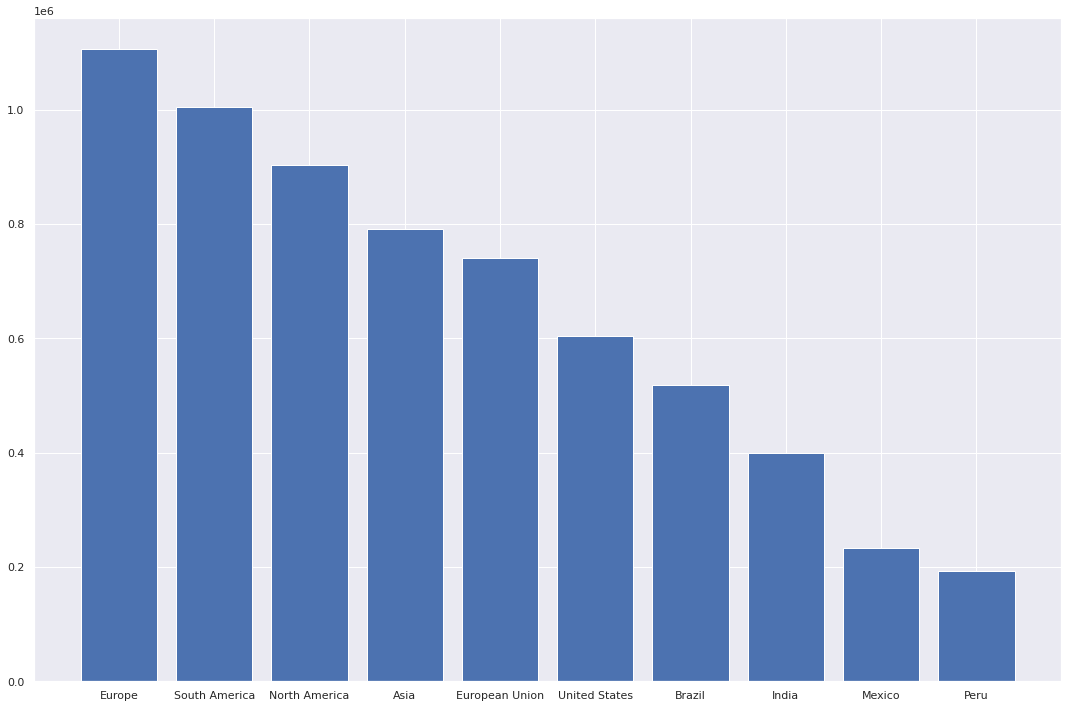

In [ ]:
# gráfico de barras para total de mortes
df.top_10_total_mortes = df.loc[df.date == '2021-06-30', ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:11]

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'total_deaths', data=df.top_10_total_mortes)

plt.tight_layout();


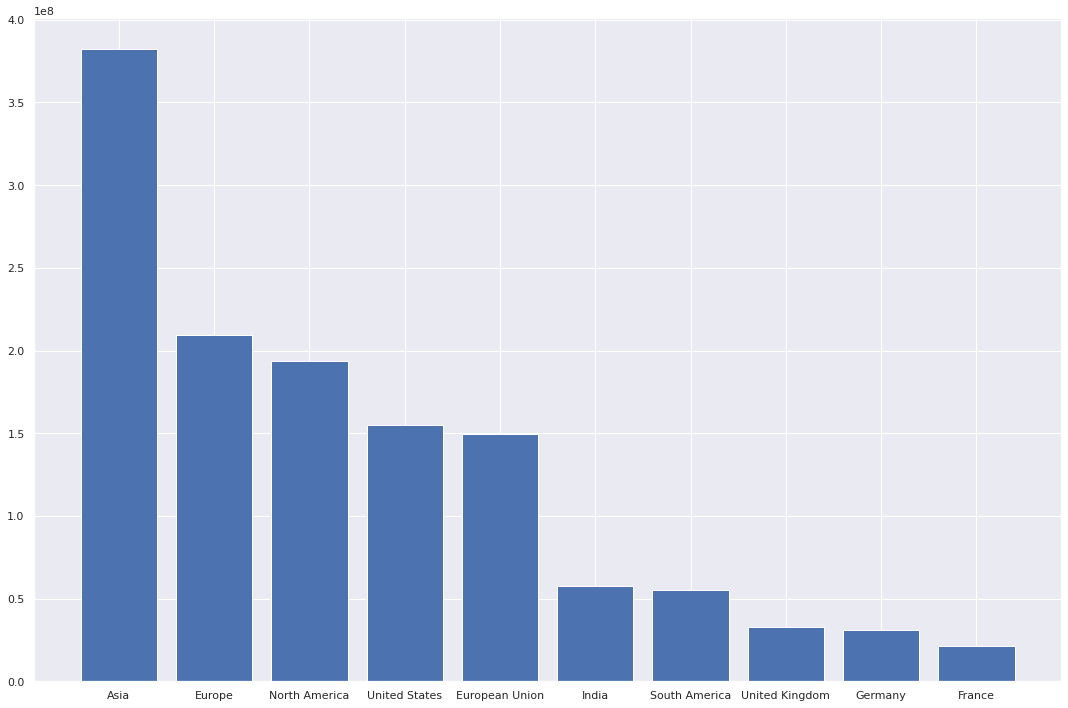

In [ ]:
# gráfico de barras para total de pessoas imunizadas
df_top_10_pessoas_totalmente_vacinada = df.loc[df.date == '2021-06-30', ['location', 'people_fully_vaccinated']].sort_values(by='people_fully_vaccinated', ascending=False)[1:11]

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'people_fully_vaccinated', data=df_top_10_pessoas_totalmente_vacinada)

plt.tight_layout()

#### Como a COVID-19 está progredindo no mundo?

A evolução do vírus ainda é uma das maiores preocupação da OMS e dos países. E para visualizarmos a evolução da doença no tempo, plotamos o gráfico de linhas dos casos de mortes e de pessoas totalmente imunizadas.

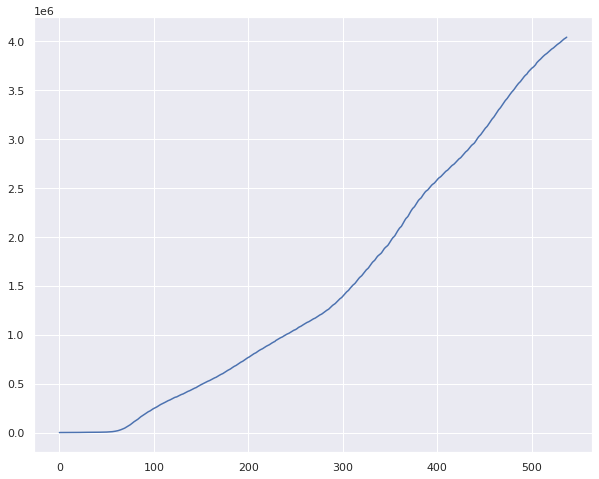

In [ ]:
# curva de mortes no mundo
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(10,8));

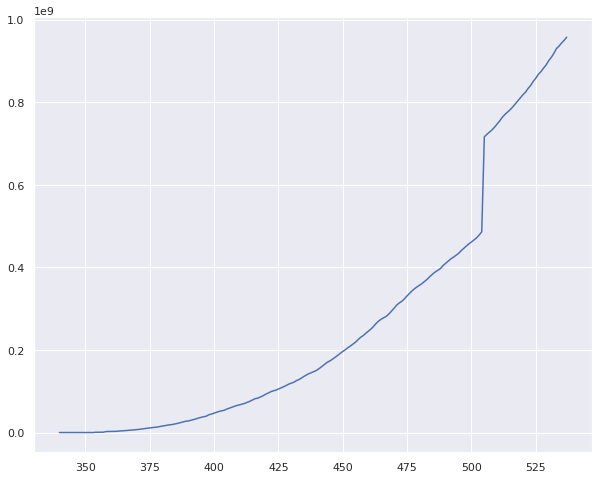

In [ ]:
# total de pessoas totalmente vacinadas
df.loc[df.location == 'World', 'people_fully_vaccinated'].reset_index(drop=True).plot(figsize=(10,8));

### Análise Exploratória para o Brasil

Após analisarmos os dados da COVID-19 no mundo, vamos verificar o panorama da doença no Brasil.


In [ ]:
# criando cópia do dataframe apenas com o Brasil
df_brasil = df.loc[df.location == 'Brazil'].copy()


# verificando as 05 primeiras entradas
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
12969,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12970,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12971,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12972,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91
12973,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN


In [ ]:
# substituindo todos os valores NaN por 0 (zero)
df_brasil = df_brasil.fillna(0)

In [ ]:
# verificando o último dia de atualização do dataset
df_brasil.date.max()

Timestamp('2021-07-12 00:00:00')

In [ ]:
# verficando o primeiro dia de registro do dataset
df_brasil.date.min()

Timestamp('2020-02-26 00:00:00')

Conforme observado acima, os dados do nosso dataset inclui datas de 26/02/2020 até 12/07/2021. 

Vamos verificar quando foi registrada a primeira morte decorrente do COVID-19 no Brasil.

In [ ]:
# identificar quando foi registrada a primeira morte no Brasil
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
12989,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,0.143,1.51,0.569,0.195,0.005,0.005,0.001,2.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.87,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,0.0


Podemos observar que a primeira morte decorrente da doença foi 17/03/2020 

Agora vamos verificar quando foi registrada o primeiro caso de COVID-19 no Brasil.

In [ ]:
# identificar quando foi registrado o primeiro caso no Brasil
df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
12969,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.0,0.0,0.005,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,0.0


O primeiro caso registrado foi no dia 26/02/2020.

Um informação interessante é sabermos quanto tempo levou entre o registro do primeiro caso e a primeira morte.

In [ ]:
# identificar quantos dias demorou para registrar a primeira morte após o registro de primeiro caso
from datetime import date
delta = df_brasil.date.loc[12989] - df_brasil.date.loc[12969]
print('Após {} dias do registro do primeiro caso foi registrada a primeira morte no Brasil.'.format(delta.days))

Após 20 dias do registro do primeiro caso foi registrada a primeira morte no Brasil.


Analisando quando foi registrada a primeira vacina no Brasil.

In [ ]:
# identificar quando foi registrada a primeira aplicação de vacina no Brasil
df_brasil.loc[df_brasil['new_vaccinations'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
13295,BRA,South America,Brazil,2021-01-17,8488099.0,33040.0,54615.571,209847.0,551.0,963.857,39932.831,155.439,256.943,987.239,2.592,4.535,1.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,112.0,112.0,0.0,112.0,112.0,0.0,0.0,0.0,1.0,72.69,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,0.0


A primeira vacina no Brasil foi registrada em 17/01/2021, ou seja 326 dias após o registro do primeiro caso, conforme podemos observar abaixo.

In [ ]:
# identificar quanto dias demorou entre o primeiro caso e a primeira aplicação de vacina
delta = df_brasil.date.loc[13295] - df_brasil.date.loc[12969]
print('Após {} dias do registro do primeiro caso foi registrada aplicação da primeira dose de vacina no Brasil.'.format(delta.days))

Após 326 dias do registro do primeiro caso foi registrada aplicação da primeira dose de vacina no Brasil.


Vamos plotar gráficos de linha para compararmos o avanço dos casos, mortes e pessoas totalmente imunizadas no Brasil.

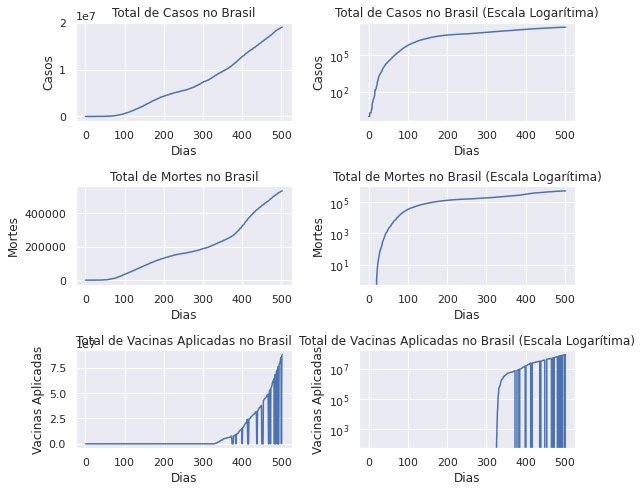

In [ ]:
# Plotar gráficos de linha em escala linear e logarítima para os casos totais, mortes totais e total de doses de vacinas aplicadas
x = list(range(503))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']
z3 = df_brasil['people_vaccinated']

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(9, 7))
ax1.set_title("Total de Casos no Brasil")
ax1.set_xlabel("Dias")
ax1.set_ylabel("Casos")
ax1.plot(x, z)

ax2.set_title("Total de Casos no Brasil (Escala Logarítima)")
ax2.set_xlabel("Dias")
ax2.set_ylabel("Casos")
ax2.set_yscale("log")
ax2.plot(x, z)

ax3.set_title("Total de Mortes no Brasil")
ax3.set_xlabel("Dias")
ax3.set_ylabel("Mortes")
ax3.plot(x, z2)

ax4.set_title("Total de Mortes no Brasil (Escala Logarítima)")
ax4.set_xlabel("Dias")
ax4.set_ylabel("Mortes")
ax4.set_yscale("log")
ax4.plot(x, z2)

ax5.set_title("Total de Vacinas Aplicadas no Brasil")
ax5.set_xlabel("Dias")
ax5.set_ylabel("Vacinas Aplicadas")
ax5.plot(x, z3)

ax6.set_title("Total de Vacinas Aplicadas no Brasil (Escala Logarítima)")
ax6.set_xlabel("Dias")
ax6.set_ylabel("Vacinas Aplicadas")
ax6.set_yscale("log")
ax6.plot(x, z3)

plt.tight_layout()

In [ ]:
df_brasil.date.loc[13471]

Timestamp('2021-07-12 00:00:00')

Por fim, vamos plotar o gráfico Waffle para compararmos as pessoas imunizadas com as pessoas que ainda não receberam nenhuma vacina ou estão pendentes da segunda dose.

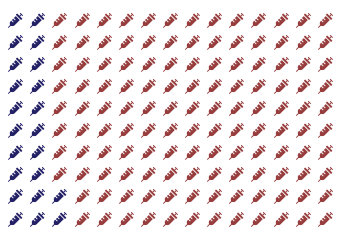

In [ ]:
# comparação de pessoas totalmente vacinadas em relação às pessoas que não estão imunizadas completamente
populacao = df_brasil['population'].loc[13471]
imunizadas_totalmente = df_brasil['people_fully_vaccinated'].loc[13471]
nao_imunizadas = populacao - imunizadas_totalmente

fig = plt.figure(
                FigureClass=Waffle,
                rows=10,
                columns=15,
                colors=("#232066", "#983D3D"),
                values=[imunizadas_totalmente, nao_imunizadas],
                icons='syringe', icon_size=15,
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.1, 1),
                        'fontsize': 8},
                icon_legend=True
                 )

fig.set_tight_layout(False)
plt.show()

Como podemos perceber há ainda muitas pessoas a serem imunizadas no Brasil, e as pessoas totalmente imunizadas correspondem uma parcela bem pequena em relação a população do Brasil.

## Conclusão

O artigo buscou demonstrar o panorama da COVID-19 no Brasil e no mundo, utilizando os dados disponibilizados pela *Our World in Data*, que é uma publicação digital especializada em expor pesquisas empíricas e dados analíticos sobre mudanças nas condições de qualidade de vida ao redor do mundo.

Importante relatar que há diversas fontes de informação divergentes referentes ao vírus, seja pública ou privada, dificultando um consenso geral quanto aos dados.

Contudo, levando em conta o contexto dos dados analisados, podemos destacas os seguintes pontos:

* Os Estados Unidos é o paíse com maior número de casos, mortes e de pessoas imunizadas.
* O Méximo apesar de não aparecer entre os países com mais caso, aparece com um dos países com mais mortes, o que merece um estudo maior.
* O número de caso e morte no Brasil continua crescendo muito.
* A primeira morte no Brasil foi registrada 20 dias após o registro do primeira caso.
* A primeira vacina no Brasil foi aplicada após 326 dias do primeiro caso.
* Ainda há uma parcela muito grande da população a ser imunizada no Brasil

Por fim, podemos verificar que com uma análise inicial conseguimos retirar muitas infomações valiososas. O artigo trouxe apenas uma demostração de como podemos explorar o conjunto de dados para gerar informação e que várias outras poderam ser geradas a partir desse dataset.
